# Kalman Filter

In [1]:
import kf

In [2]:
############################################
### use the code below to test your filter!
############################################

measurements = [1, 2, 3]
kf.localize(measurements)

# output should be:
# x (location, velocity): [[3.9996664447958645], [0.9999998335552873]]
# P: [[2.3318904241194827, 0.9991676099921091], [0.9991676099921067, 0.49950058263974184]]

[[3.9996664447958645], [0.9999998335552873]] [[2.3318904241194827, 0.9991676099921091], [0.9991676099921067, 0.49950058263974184]]


# Entropy
In general, entropy represents the amount of uncertainty in a system. Since the measurement update step decreases uncertainty, entropy will decrease. The movement step increases uncertainty, so entropy will increase after this step.

Let's look at our current example where the robot could be at one of five different positions. The maximum uncertainty occurs when all positions have equal probabilities [0.2, 0.2, 0.2, 0.2, 0.2][0.2,0.2,0.2,0.2,0.2]

Following the formula Entropy = \Sigma (-p \times log(p))Entropy=Σ(−p×log(p)), we get -5 \times (.2)\times log(0.2) = 0.699−5×(.2)×log(0.2)=0.699.

Taking a measurement will decrease uncertainty and entropy. Let's say after taking a measurement, the probabilities become [0.05, 0.05, 0.05, 0.8, 0.05][0.05,0.05,0.05,0.8,0.05]. Now we have a more certain guess as to where the robot is located and our entropy has decreased to 0.338.

# PID Control
## P (Proportional) control
Angle = tau x cte
Issue: Overshoot
## D (Differential) control
Gracefully tuned
Issue: System bias: What if the steering is misaligned?
## I (Integral) control
Fix the system bias
## twiddle: Optimize parameters
Auto tune tau_P, tau_D, tau_I

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pid

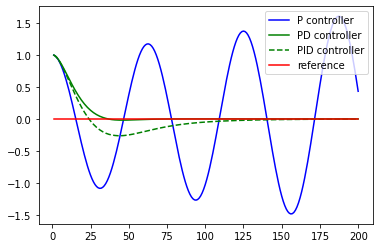

In [4]:
drift = 0
# P-control only
robot = pid.make_robot(drift)
params = [0.2, 0, 0] # tau_P, tau_D, tau_I
x_trajectory, y_trajectory_p, err = pid.run(robot, params)
# PD-Control
robot = pid.make_robot(drift)
params = [0.2, 3.0, 0]
x_trajectory, y_trajectory_pd, err = pid.run(robot, params)
## PID-Control
robot = pid.make_robot(drift)
params = [0.2, 3.0, 0.004]
x_trajectory, y_trajectory_pid, err = pid.run(robot, params)

n = len(x_trajectory)

plt.plot(x_trajectory, y_trajectory_p, 'b', label='P controller')
plt.plot(x_trajectory, y_trajectory_pd, 'g', label='PD controller')
plt.plot(x_trajectory, y_trajectory_pid, '--g', label='PID controller')
plt.plot(x_trajectory, np.zeros(n), 'r', label='reference')

plt.legend(loc='upper right')
plt.show()

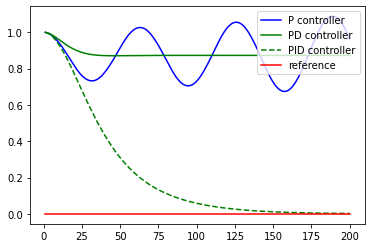

In [5]:
drift = 10
# P-control only
robot = pid.make_robot(drift)
p = [0.2, 0, 0]
x_trajectory, y_trajectory_p, err = pid.run(robot, p)
# PD-Control
robot = pid.make_robot(drift)
p = [0.2, 3.0, 0]
x_trajectory, y_trajectory_pd, err = pid.run(robot, p)
## PID-Control
robot = pid.make_robot(drift)
p = [0.2, 3.0, 0.004]
x_trajectory, y_trajectory_pid, err = pid.run(robot, p)

n = len(x_trajectory)

plt.plot(x_trajectory, y_trajectory_p, 'b', label='P controller')
plt.plot(x_trajectory, y_trajectory_pd, 'g', label='PD controller')
plt.plot(x_trajectory, y_trajectory_pid, '--g', label='PID controller')
plt.plot(x_trajectory, np.zeros(n), 'r', label='reference')

plt.legend(loc='upper right')
plt.show()

Iteration 0, best error = 8315.955485215645
Iteration 50, best error = 6.486248421840799e-16
Iteration 100, best error = 3.9945448999632544e-17
Iteration 150, best error = 3.562846420216524e-17
Final twiddle error = 3.562846420216524e-17


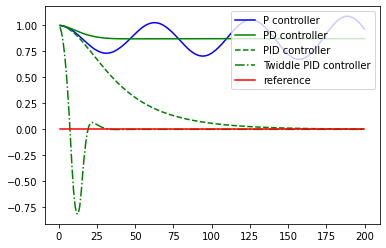

In [6]:
drift = 10
# P-control only
robot = pid.make_robot(drift)
params = [0.2, 0, 0]
x_trajectory, y_trajectory_p, err = pid.run(robot, params)
# PD-Control
robot = pid.make_robot(drift)
params = [0.2, 3.0, 0]
x_trajectory, y_trajectory_pd, err = pid.run(robot, params)
## PID-Control
robot = pid.make_robot(drift)
params = [0.2, 3.0, 0.004]
x_trajectory, y_trajectory_pid, err = pid.run(robot, params)

# tune parameters (tau_P, tau_I, tau_D) by twiddle
params, err = pid.twiddle(drift)
print("Final twiddle error = {}".format(err))
robot = pid.make_robot(drift)
x_trajectory, y_trajectory_twiddle, err = pid.run(robot, params)
n = len(x_trajectory)

plt.plot(x_trajectory, y_trajectory_p, 'b', label='P controller')
plt.plot(x_trajectory, y_trajectory_pd, 'g', label='PD controller')
plt.plot(x_trajectory, y_trajectory_pid, '--g', label='PID controller')
plt.plot(x_trajectory, y_trajectory_twiddle, '-.g', label='Twiddle PID controller')
plt.plot(x_trajectory, np.zeros(n), 'r', label='reference')

plt.legend(loc='upper right')
plt.show()

# Reference
1. [A Kalman filter explained](https://jonathan-hui.medium.com/self-driving-object-tracking-intuition-and-the-math-behind-kalman-filter-657d11dd0a90)